# <font color='blue'>**Proyecto 1: Modelo Epidemiológico Básico**</font>

**Adaptado de Contagio Lineal, Leonardo Martinez Sandoval, 2019.**


El objetivo de esta actividad es construir un modelo epidemiológico básico usando álgebra lineal. Para ello, se modelará la epidemia como un **modelo de Markov**.

*Nota 1: En primer luga rdebe quedar claro que ningún modelo es una representación perfecta de la realidad. Su validez depende de lo razonables que sean las estimaciones o suposiciones tomadas y de su grado de aproximación a la realidad*

Con este modelo básico, se podrán verificar varias de las acciones que hemos estado aprendiendo durante la crisis de la pandemia del coronavirus. 

Se estudiarán dos escenarios posibles:

1. La gente sale de sus casas.
2. La gente se queda en sus casas.

Para modelar se usarán las librerías **NumPy** y **Matplotlib**.

*Nota 2: La librería Matplotlib se revisará en detalle en el módulo 3 del diplomado. En esta actividad la utilizaremos para graficar los resultados de nuestro modelo.*

El objetivo es construir un modelo que nos permita visualizar la evolución de la enfermedad en el tiempo (ver figura).

<img src='https://drive.google.com/uc?export=view&id=1JEQuOy062yyASrdO3xmNtCO25nITmvWW' width="500" align="center" style="margin-right: 20px">

# <font color='blue'>**Introducción**</font>

## <font color='blue'>**¿Qué es un modelo de Markov?**</font>

Un modelo de Markov aplicado al campo sanitario puede definirse como **un modelo estocástico de una enfermedad en el que se asume que el paciente se encuentra siempre en uno de un número finito de estados de salud**, denominados estados de Markov, los cuales deben ser **exhaustivos**, es decir, todos los posibles; y **mutuamente excluyentes**, un individuo no puede estar en dos estados al mismo tiempo.

Los estados pueden ser de dos tipos: 

1. **Absorbentes**: aquellos que no pueden abandonarse, siendo el más habitual y obvio el estado de *muerte*.

2. **No absorbentes**: cualquier estado desde el que se puede pasar a otro distinto.

Los acontecimientos se modelizan como pasos o transiciones de unos estados a otros que se producen en períodos uniformes de tiempo, que se denominan ciclos de Markov, y con una probabilidad de transición que depende del estado en el que se encuentre el individuo en cada momento.

Los modelos de Markov pueden representarse gráficamente como una variante de los árboles de decisión empleados en los modelos determinísticos, como diagramas en cascada, o bien como un diagrama de influencias.

Posibles representaciones gráficas de los modelos de Markov. A: como árboles de decisión. B: como diagramas en cascada. C: como diagramas de influencia.

<img src='https://drive.google.com/uc?export=view&id=1vRLKkWgZkLskeYVtm5zuVEbeDPmXQh44' width="400" align="center" style="margin-right: 20px">

*Referencia: C. Rubio Terrés, "Introduction to the use of Markov models in pharmacoeconomic analysis," Farmacia Hospitalaria, vol. 24, n°4, 241-247, 2000.*

### <font color='blue'>**¿Cuándo debe utilizarse un modelo de Markov y con qué condiciones?**</font>

Puede estar justificado utilizar un modelo de Markov cuando se trata de eventos repetitivos, irreversibles y de larga duración. En caso de realizarse, las condiciones generales de los modelos de Markov son las siguientes:

* Sólo se permiten unas determinadas transiciones entre estados previamente establecidas.

* La duración de los ciclos de Markov, que es arbitraria, debe ser constante a lo largo de la simulación.

* Cada paciente sólo puede hacer una transición en cada ciclo.

* Todos los pacientes están sometidos a las mismas probabilidades de transición.

### <font color='blue'>**Ventajas e inconvenientes de los modelos de Markov**</font>

Los modelos de Markov ayudan a modelizar eventos sanitarios complejos que pueden simplificarse en exceso con los modelos determinísticos. 

Son especialmente útiles para modelizar enfermedades crónicas. La modelización de Markov intenta simular de una manera más *«realista»* lo que ocurre en el proceso de la enfermedad. Sin embargo, en algunas ocasiones este tipo de modelo puede ser inviable debido a la insuficiencia de los datos disponibles. Por ejemplo, en modelos muy complejos puede ser difícil establecer la totalidad de las probabilidades de transición entre los estados de salud.

Por otra parte, en los modelos se hace una suposición bastante fuerte, la denominada suposición markoviana. De acuerdo con ésta **el modelo carece de «memoria»** y se asume que conociendo únicamente el estado de salud presente de un paciente es posible simular la evolución futura del mismo; es decir, se asume que todos los pacientes que se encuentran en un estado de salud, en un momento concreto, tienen el mismo pronóstico, independientemente de su estado previo. Por tanto, un paciente que pasa del estado *«sano»* al de *«enfermo»* tendría el mismo pronóstico que otro paciente *«enfermo»* que transcurrido el ciclo siguiese en el mismo estado de *«enfermo»*. Esta suposición del modelo no se ajusta estrictamente a la realidad de numerosas enfermedades, por lo que supone un inconveniente de los modelos de Markov.

# <font color='blue'>**Modelo epidemiológico básico para Covid19**</font>

## <font color='blue'>**Suposiciones y modelo de Markov**</font>

1. La población inicial es de 100.000 habitantes sanos, en el día 0.

2. Una persona puede estar en alguno de los siguientes cinco estados:
    * Sano
    * Síntomas leves
    * Síntomas graves
    * Recuperado
    * Fallecido

3. Asociado a los estados anteriores podemos obtener las siguientes probabilidades de transición:
    * $s_l$, la probabilidad de pasar de estar sano a tener síntomas leves,
    * $l_g$, la probabilidad de pasar de tener síntomas leves a graves,
    * $l_r$, la probabilidad de pasar de tener síntomas leves a recuperarse,
    * $g_r$, la probabilidad de pasar de tener síntomas graves a recuperarse y
    * $g_f$, la probabilidad de pasar de tener síntomas graves, a fallecer.

Para cada día $n$, consideremos el vector:

$$\mathbf{X}(n) = \begin{pmatrix}s(n), l(n), g(n), r(n), f(n)\end{pmatrix}$$

que corresponde a los individuos sanos, los de síntomas leves, de síntomas graves, recuperados y fallecidos al día $n$.

Por ejemplo al día $0$ todos los individuos están sanos, así que $X(0)=(100000,0,0,0,0)$.

Para la evolución entre los distintos estados de Markov, se realizan las siguientes suposiciones:

1. Paso de un estado a otro:
    * Los únicos fallecidos del periodo de tiempo que tendremos son por Covid19. Sólo se puede fallecer de ello tras tener síntomas graves. Si alguien tiene síntomas graves, entonces tiene cierta probabilidad $g_f$ de fallecer al día siguiente, $g_r$ de recuperarse y por lo tanto $(1-g_r-g_f)$ de quedarse como enfermo grave.
        
    * Covid19 se contagia de persona a persona, y de un día a otro una persona tiene probabilidad $s_l$ de pasar de estar sana a tener síntomas leves. No se puede pasar directamente a tener síntomas graves, recuperarse o morir. De modo que se queda sana de un día a otro con probabilidad $(1-s_l)$.
        
    * Si una persona tiene síntomas leves, tiene probabilidad $l_g$ de pasar a tener síntomas graves y $l_r$ de pasar a recuperarse. Por lo tanto, tiene probabilidad $(1-l_g-l_r)$ de quedarse con síntomas leves.
        
    * Una persona que se recupera desarrolla inmunidad a Covid19, así que se queda en ese estado.
        
    * Una persona que fallece, se queda en ese estado.
    
En otras palabras, tenemos el siguiente diagrama de infleuncia para las transicioens de un estado a otro, en donde los números en las flechas muestran la probabilidad de pasar de un estado a otro:

<img src='https://drive.google.com/uc?export=view&id=14xNoCzg-RxK7-34axR-MIkhaJ9c86BkU' width="700" align="center" style="margin-right: 20px">

Con estos números y suposiciones, podemos entender, en valor esperado, cómo será el vector de población

$$\mathbf{X}(n+1) = \begin{pmatrix}s(n+1), l(n+1), g(n+1), r(n+1), f(n+1)\end{pmatrix}$$

si sabemos cómo es el vector

$$\mathbf{X}(n) = \begin{pmatrix}s(n), l(n), g(n), r(n), f(n)\end{pmatrix}$$

Por ejemplo, podemos esperar que la cantidad de recuperados al día $n+1$ sea:

$$r(n+1) = l_r·l(n) + g_r·g(n) + 1·r(n)$$

pues de los de síntomas leves del día $n$ habrá una proporción $l_r$ de ellos que se recuperen, de los graves del día $n$ habrá una proporción $g_r$ de ellos que se recuperen, y todos los recuperados del día $n$ se quedan recuperados. De esta forma, obtenemos el siguiente sistema de ecuaciones de lo que podemos esperar:

$s(n+1) = (1 - s_l)·s(n)$

$l(n+1) = s_l·s(n)+(1-l_r-l_g)·l(n)$

$g(n+1) = l_g·l(n)+(1-g_r-g_f)·g(n)$

$r(n+1) = l_r·l(n)+g_r·g(n)+1·r(n)$

$f(n+1) = g_f·g(n)+1·f(n)$

Este sistema de ecuaciones se puede escribir de una forma mucho más compacta. Si definimos la matriz:

$$\mathbf{A}=\begin{pmatrix} 1-s_l & 0 & 0 & 0 & 0 \\s_l & 1-l_r-l_g & 0 & 0 & 0 \\0 & l_g & 1-g_r-g_f & 0 & 0 \\ 0 & l_r & g_r & 1 & 0\\ 0 & 0 & g_f & 0 & 1 \end{pmatrix}$$

las ecuaciones anteriores se pueden abreviar simplemente a:

$$X(n+1)=AX(n)$$

De esta forma, si queremos entender qué esperar del día $n$, basta hacer la multiplicación matricial:

$$X(n)=A^n X(0)$$.

## <font color='green'>**Escenario 1: Tasa de contagio alta**</font>

Se tienen los siguientes valores para los parámetros del modelo: $s_l=0.30$, $l_g=0.10$, $l_r=0.20$, $g_r=0.10$ y $g_f=0.10$.

1. Implmente el modelo epidemiológico básico mediante una función en Python.

2. Grafique los resultados de su modelo para mostrar como evoluciona la epidemia de Covid19 para un periodo de 60 días.

3. Entregue los resultados para la evolución de la enfermedad en la primera semana de análisis.

4. Para el último día de la ventana de estudio, calcule la cantidad de individuos recuperados y fallecidos.

In [1]:
# Parte 1

import numpy as np
import matplotlib.pyplot as plt

# Población inicial (supuesto 1)
x_0 = np.array([100000, 0, 0, 0, 0])
x_0 = x_0.reshape((-1,1))

# Definimos las probabilidades de transición (supuesto 3 y datos del enunciado)
S_L = 0.3
L_G = 0.1
L_R = 0.2
G_R = 0.1
G_F = 0.1

# Definimos la matriz A
A = np.array([[1 - S_L, 0, 0, 0, 0],
              [S_L, 1 - L_R - L_G, 0, 0, 0],
              [0, L_G, 1 - G_R - G_F, 0, 0],
              [0, L_R, G_R, 1, 0],
              [0, 0, G_F, 0, 1]
             ])

# Encontramos la evolución de la epidemia los primeros 60 días
dias = 60
evolucion = np.empty((61, 5))
evolucion[0] = x_0.transpose()

for j in range(dias):
    matriz_A = np.linalg.matrix_power(A, j+1)
    x_n = np.matmul(matriz_A, x_0)
    evolucion[j+1] = x_n.transpose()


In [3]:
evolucion[60]

array([5.08021861e-05, 1.30634193e-03, 4.58289914e-01, 8.33331031e+04,
       1.66664373e+04])

En Numpy se pueden multiplicar matrices con la función:

```
np.matmul(A,X)
```

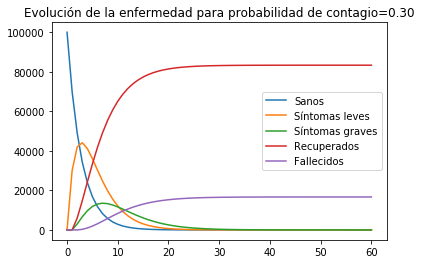

In [29]:
#Parte 2

#Gráfica para mostrar la evolución de la pandemia en el periodo de tiempo analizado
plt.plot([j[0] for j in evolucion], label="Sanos")
plt.plot([j[1] for j in evolucion], label="Síntomas leves")
plt.plot([j[2] for j in evolucion], label="Síntomas graves")
plt.plot([j[3] for j in evolucion], label="Recuperados")
plt.plot([j[4] for j in evolucion], label="Fallecidos")
plt.title("Evolución de la enfermedad para probabilidad de contagio=0.30")
plt.legend()
plt.show()

In [117]:
#Parte 3

# Mostramos la primera semana de análisis
print(f'{"Dia"} {"Sanos":>10} {"Leves":>12} {"Graves":>12s} {"Recuperados":>12s} {"Fallecidos":>12s}')

for j in range(8):
    print(f'{j} {evolucion[j][0]:12.0f} {evolucion[j][1]:12.0f} {evolucion[j][2]:12.0f} {evolucion[j][3]:12.0f} {evolucion[j][4]:12.0f}')

Dia      Sanos        Leves       Graves  Recuperados   Fallecidos
0       100000            0            0            0            0
1        70000        30000            0            0            0
2        49000        42000         3000         6000            0
3        34300        44100         6600        14700          300
4        24010        41160         9690        24180          960
5        16807        36015        11868        33381         1929
6        11765        30253        13096        41771         3116
7         8235        24706        13502        49131         4425


In [116]:
#Parte 4

#Mostramos recuperados y fallecidos al último día
print(f'Los recuperados al último día (día 60) son: {evolucion[-1][3]:0.0f}')
print(f'Los fallecidos al último día (día 60) son: {evolucion[-1][4]:0.0f}')

Los recuperados al último día (día 60) son: 83333
Los fallecidos al último día (día 60) son: 16666


## <font color='green'>**Fin Escenario 1**</font>

## <font color='green'>**Escenario 2: Menor tasa de contagio**</font>

Considere que la tasa de contagio $s_l$ disminuye y tiene un valor de 0.05. Todas las otras probabilidades de transición se mantienen inalteradas con respecto al escenario 1. Considere una ventana de análisis de 60 días.

1. Ejecute el modelo epidemiológico con las nuevas condiciones iniciales.

2. Grafique la evolución del modelo para el escenario 2.

3. Compare los escenarios 1 y 2 en términos de la cantidad de personas fallecidas a los 30 y 60 días.

4. Considere que la capacidad total del sistema de salud es de 6.000 camas. Grafique los enfermos leves y graves para ambos escenarios en conjunto con la capacidad del sistema de salud. Comente los resultados.

5. Considerando que sólo los enfermos graves utilizan camas del sistema de salud, indique, para ambos escenarios, en qué día el sistema colapsa (existen más casos graves que camas disponibles).

6. Grafique la curva de fallecidos para ambos escenarios para todo el periodo de tiempo analizado.

In [88]:
# Parte 1

import numpy as np
import matplotlib.pyplot as plt

# Población inicial (supuesto 1)
x_0 = np.array([100000, 0, 0, 0, 0])
x_0 = x_0.reshape((-1,1))

# Definimos las probabilidades de transición (supuesto 3 y datos del enunciado)
S_L = 0.05
L_G = 0.1
L_R = 0.2
G_R = 0.1
G_F = 0.1 

# Definimos la matriz A
A = np.array([[1 - S_L, 0, 0, 0, 0],
              [S_L, 1 - L_R - L_G, 0, 0, 0],
              [0, L_G, 1 - G_R - G_F, 0, 0],
              [0, L_R, G_R, 1, 0],
              [0, 0, G_F, 0, 1]
             ])

dias = 60
evolucion2 = np.empty((61, 5))
evolucion2[0] = x_0.transpose()

for j in range(dias):
    matriz_A = np.linalg.matrix_power(A, j+1)
    x_n = np.matmul(matriz_A, x_0)
    evolucion2[j+1] = x_n.transpose()

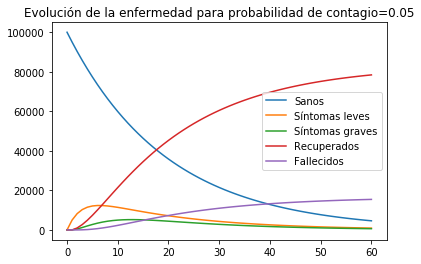

In [39]:
#Parte 2

plt.plot([j[0] for j in evolucion2], label="Sanos")
plt.plot([j[1] for j in evolucion2], label="Síntomas leves")
plt.plot([j[2] for j in evolucion2], label="Síntomas graves")
plt.plot([j[3] for j in evolucion2], label="Recuperados")
plt.plot([j[4] for j in evolucion2], label="Fallecidos")
plt.title("Evolución de la enfermedad para probabilidad de contagio=0.05")
plt.legend()
plt.show()

In [89]:
#Parte 3

print("Al día 30, para contagio bajo 0.05, el número de fallecidos es", )
print(f'{evolucion2[30][4]:0.0f}')
print("Al día 30, para contagio alto 0.3, el número de fallecidos es", )
print(f'{evolucion[30][4]:0.0f}')
print("Al día 60, para contagio bajo 0.05, el número de fallecidos es", )
print(f'{evolucion2[60][4]:0.0f}')
print("Al día 60, para contagio alto 0.3, el número de fallecidos es", )
print(f'{evolucion[60][4]:0.0f}')

Al día 30, para contagio bajo 0.05, el número de fallecidos es
10963
Al día 30, para contagio alto 0.3, el número de fallecidos es
16494
Al día 60, para contagio bajo 0.05, el número de fallecidos es
15438
Al día 60, para contagio alto 0.3, el número de fallecidos es
16666


[]

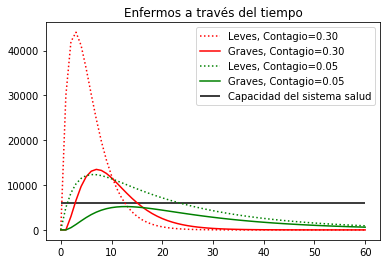

In [46]:
#Parte 4
camas = 6000
plt.plot([j[1] for j in evolucion], color="red", linestyle=":", label="Leves, Contagio=0.30")
plt.plot([j[2] for j in evolucion], color="red", label="Graves, Contagio=0.30")
plt.plot([j[1] for j in evolucion2], color="green", linestyle=":", label="Leves, Contagio=0.05")
plt.plot([j[2] for j in evolucion2], color="green", label="Graves, Contagio=0.05")
plt.hlines(camas,0,dias, color="black", label="Capacidad del sistema salud")
plt.title("Enfermos a través del tiempo")
plt.legend()
plt.plot()


In [87]:
#Parte 5

graves1 = evolucion[evolucion[:,2] > 6000]
dia1 = np.where(evolucion[:,2] == graves1[0,2])
#graves2 = 

print(f'Graves para tasa 0.30 es de {graves1[0,2]:0.0f} en el dia {dia1[0][0]} ')

Graves para tasa 0.30 es de 6600 en el dia 3 


[]

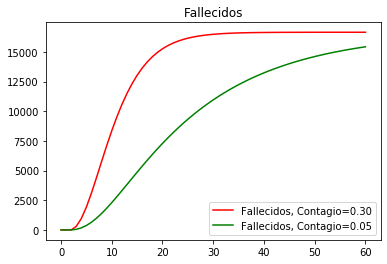

In [85]:
#Parte 6

plt.plot([j[4] for j in evolucion], color="red", label="Fallecidos, Contagio=0.30")
plt.plot([j[4] for j in evolucion2], color="green", label="Fallecidos, Contagio=0.05")
plt.title("Fallecidos")
plt.legend()
plt.plot()


## <font color='green'>**Fin Escenario 2**</font>